In [19]:
import os, sys
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
sys.path.append("/work/test-first-project/src")
from data_utils import load_training_data
import matplotlib.pyplot as plt
from datetime import timedelta

In [7]:
def change_var(a):
    a = a + 2
    return a, None
a = 4
change_var(a)
a

4

In [9]:
a = change_var(a)

In [10]:
a

(6, None)

In [72]:
input_seq[:,-1,:].shape

(7258, 2)

In [54]:
input_seq[np.full(True, (input_seq[:2])),0]

TypeError: an integer is required

<AxesSubplot:>

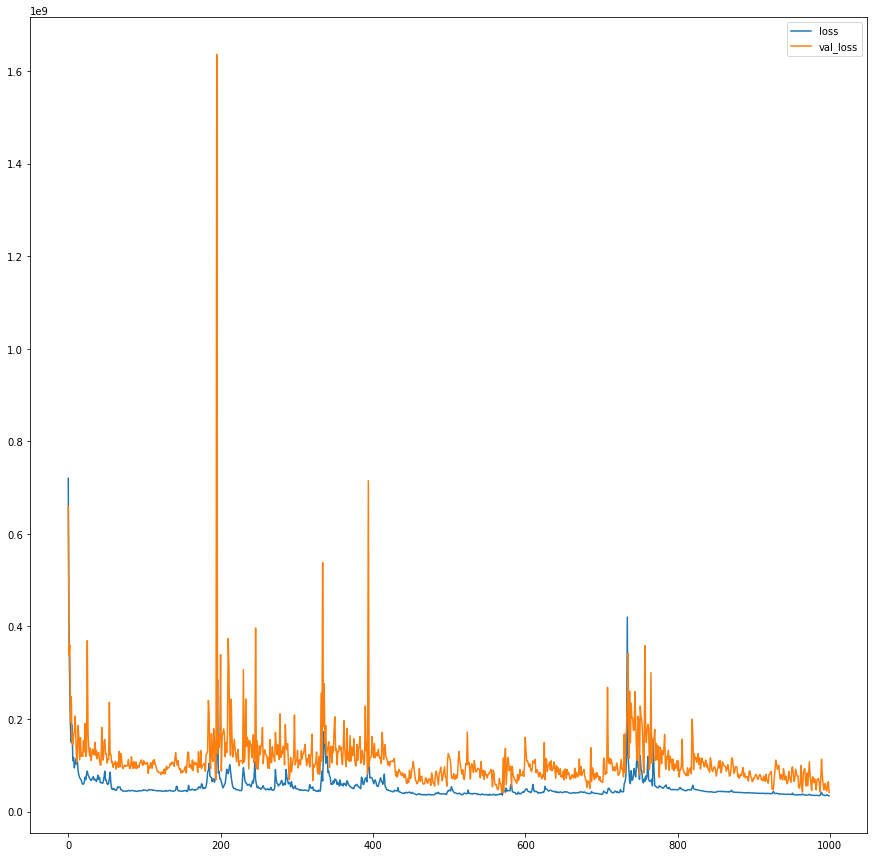

In [2]:
model_folder = "/work/test-first-project/data/models/model_1/"
csv_path = os.path.join(model_folder, "score.csv")
model_path = os.path.join(model_folder, "model/")

score_df = pd.read_csv(csv_path)
score_df.plot(figsize=(15,15))

In [3]:
input_seq, output_seq, last_in_dates, country_array = load_training_data()

In [4]:
model = load_model(model_path)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10600     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 20, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 50)            20200     
_________________________________________________________________
time_distributed (TimeDistri (None, 20, 25)            1275      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 20, 1)             26        
Total params: 32,101
Trainable params: 32,101
Non-trainable params: 0
_________________________________________________________________


In [6]:
input_seq.shape

(7258, 20, 2)

In [7]:
predictions = model.predict(input_seq)

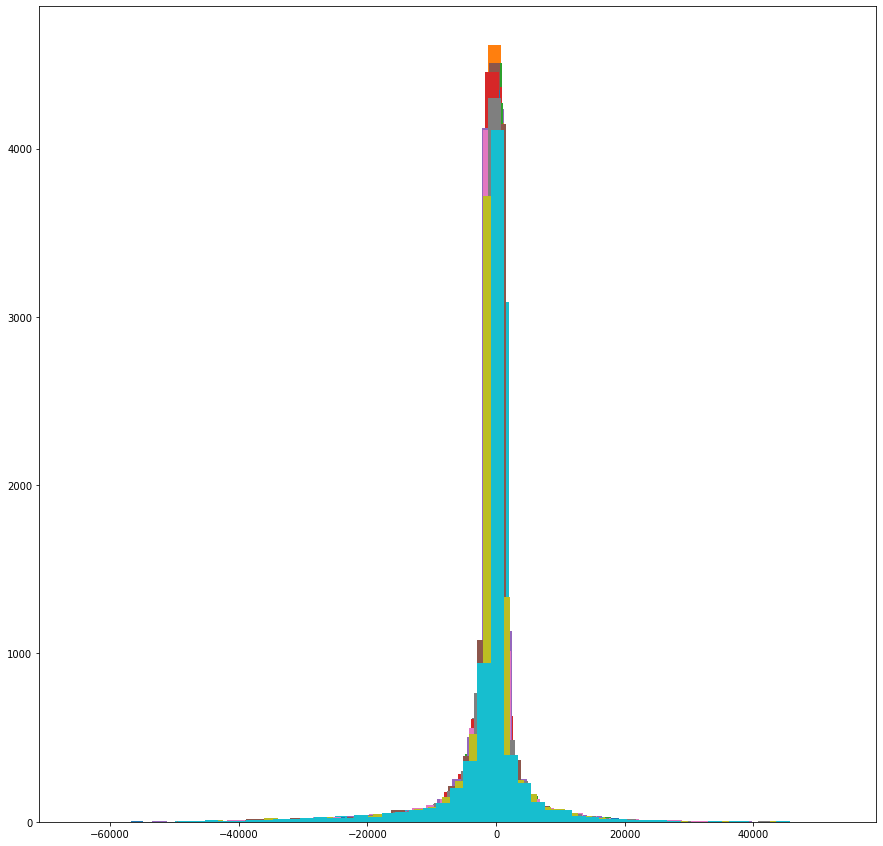

In [16]:
fig, ax = plt.subplots(figsize=(15,15))
for i in range(predictions.shape[1]):
    
    ax.hist(predictions[:, i, :] - output_seq[:, i, :], bins=50)

/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


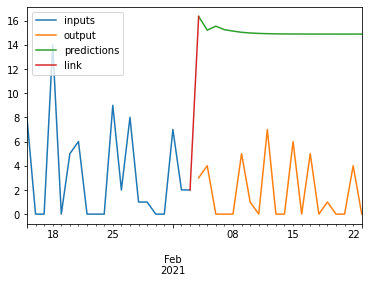

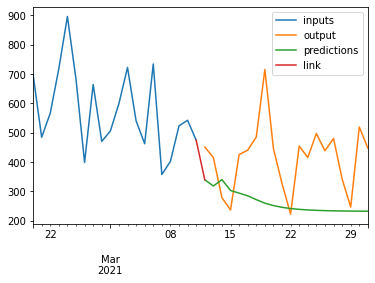

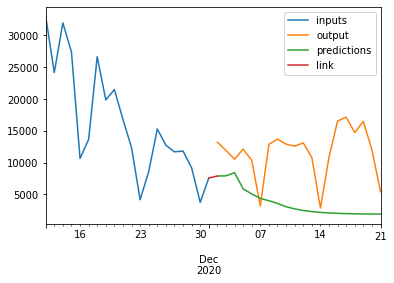

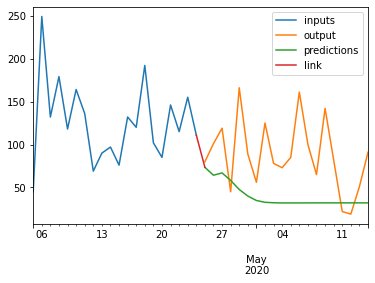

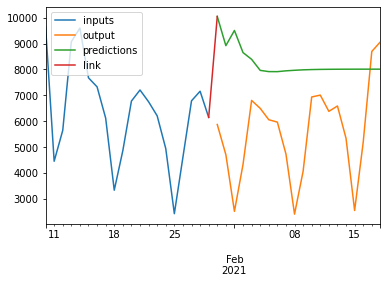

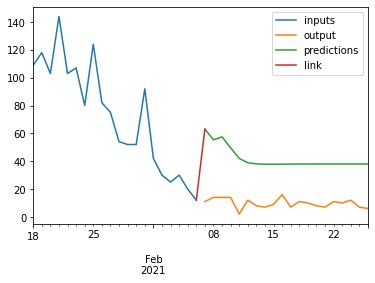

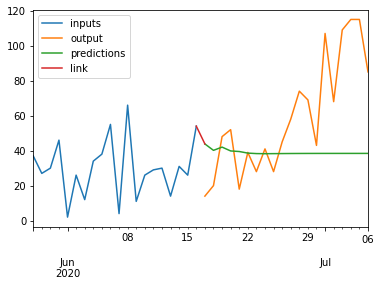

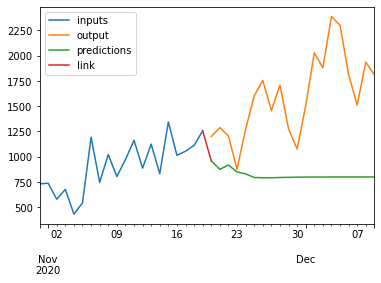

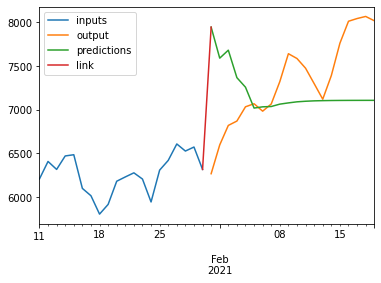

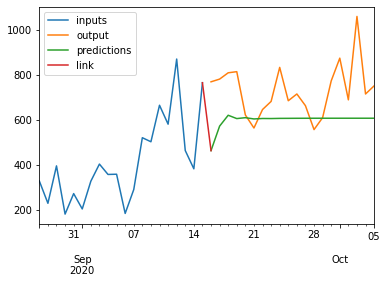

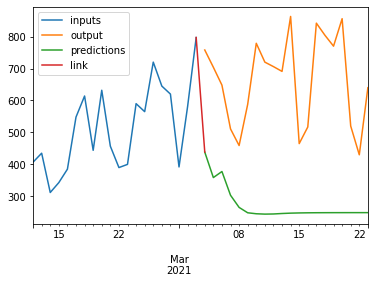

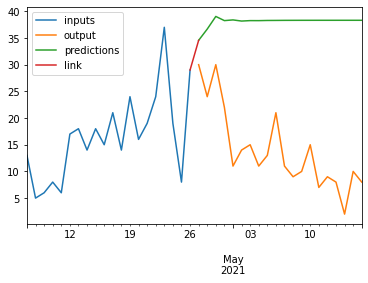

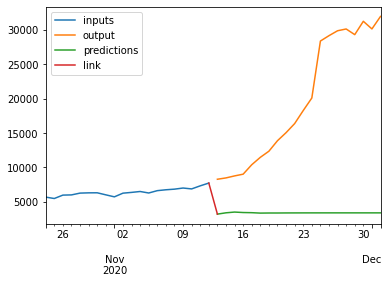

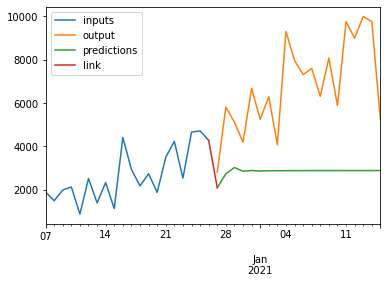

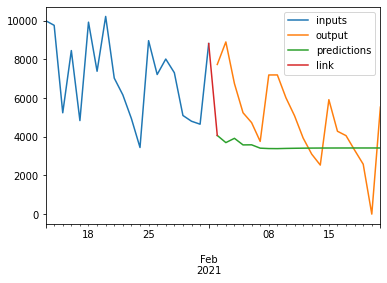

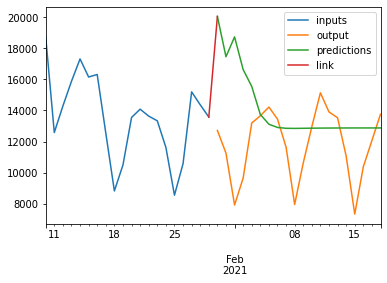

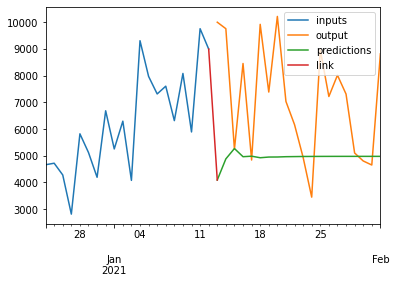

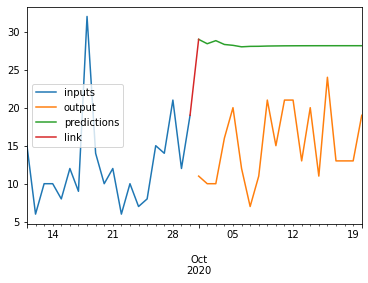

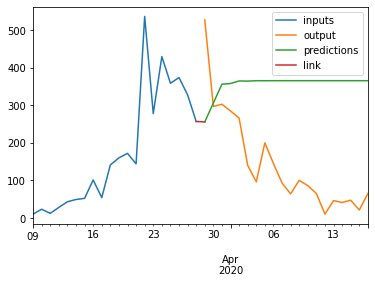

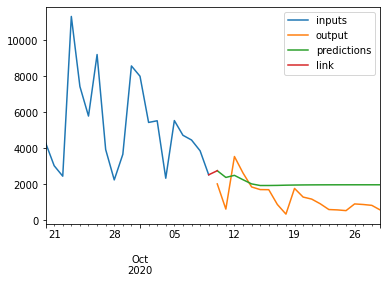

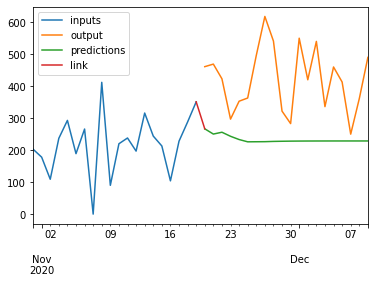

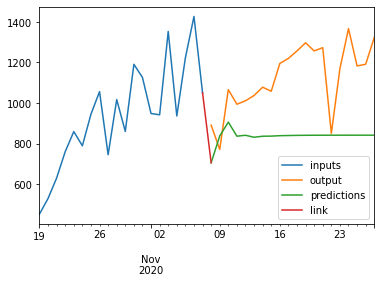

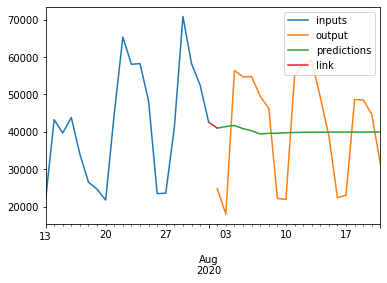

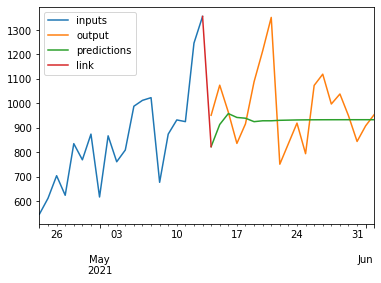

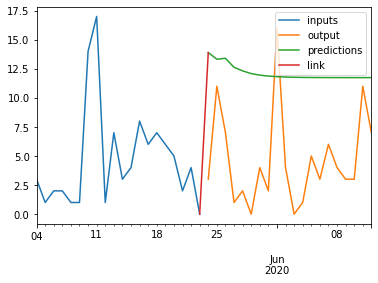

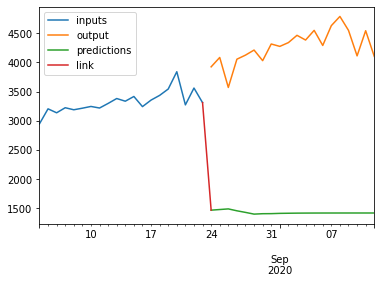

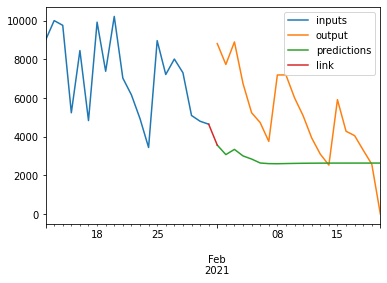

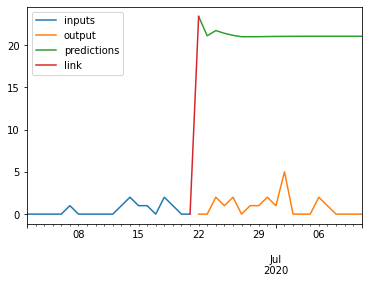

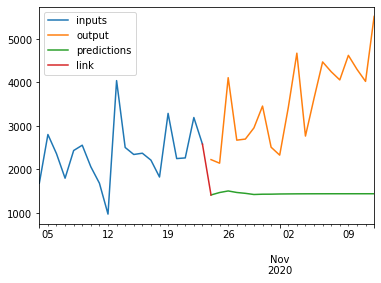

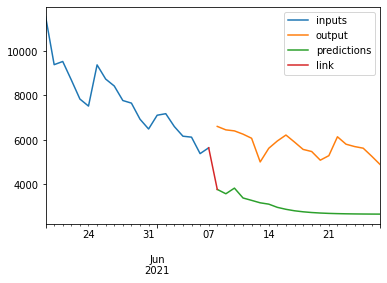

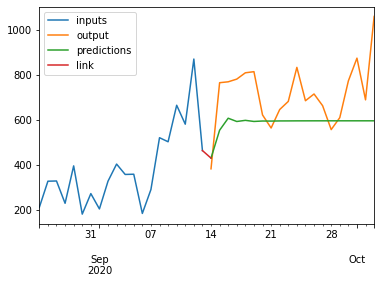

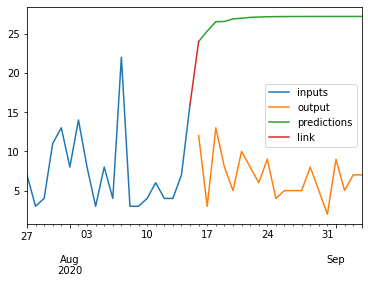

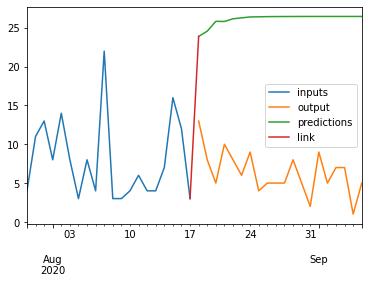

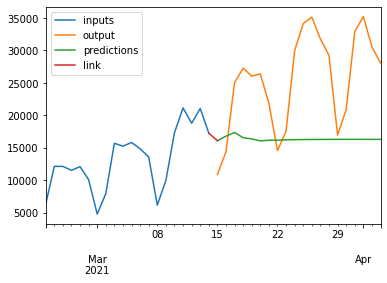

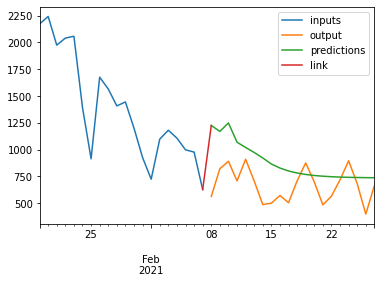

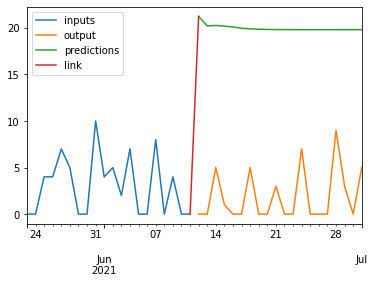

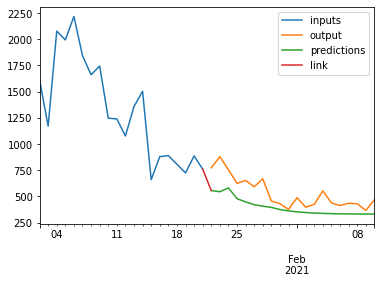

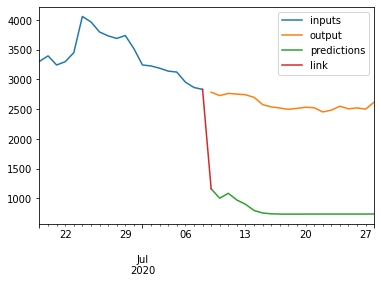

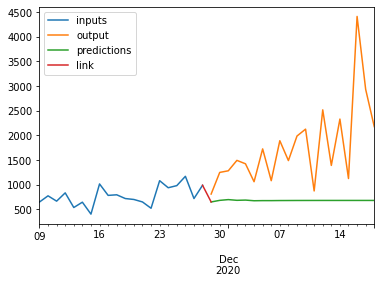

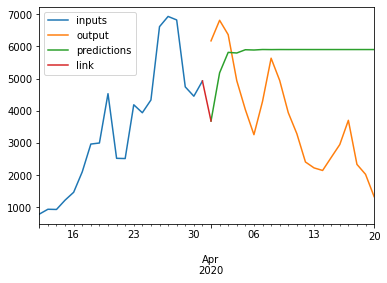

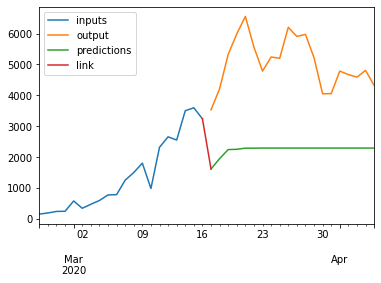

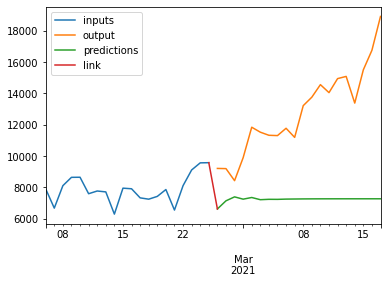

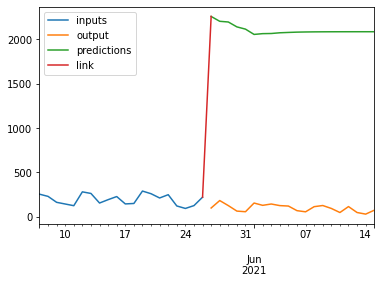

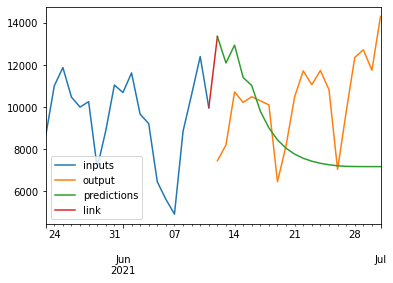

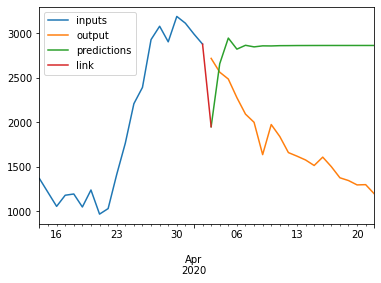

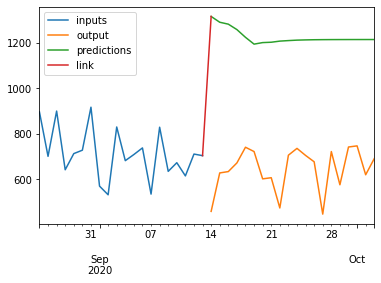

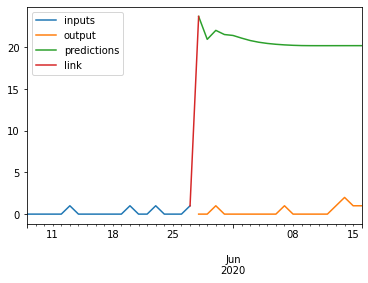

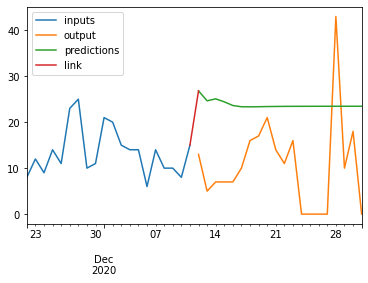

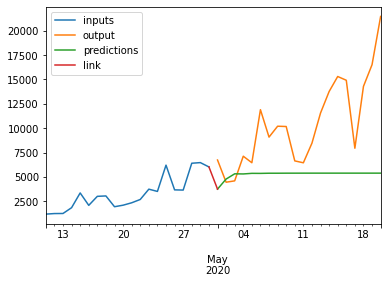

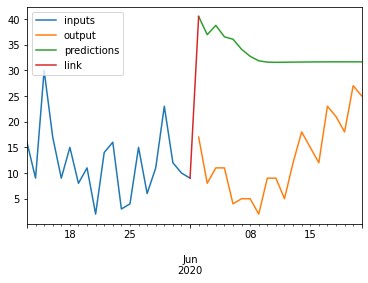

In [47]:
for i in np.random.randint(0, predictions.shape[0], (50,)):
    show(i, last_in_dates, input_seq, output_seq, predictions)

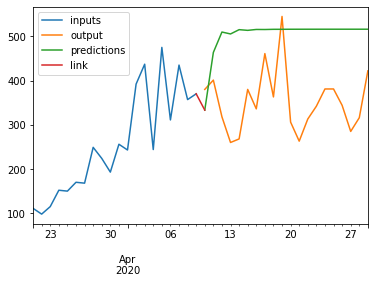

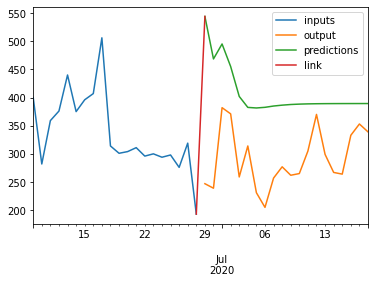

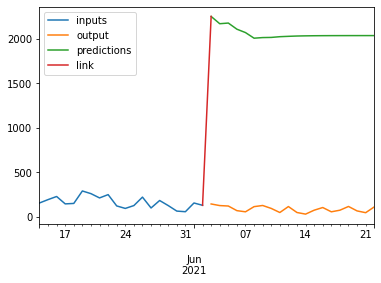

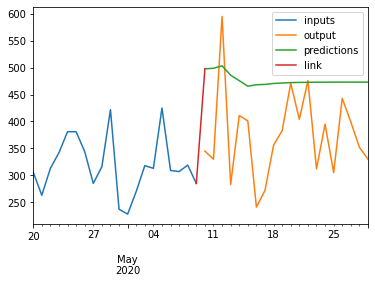

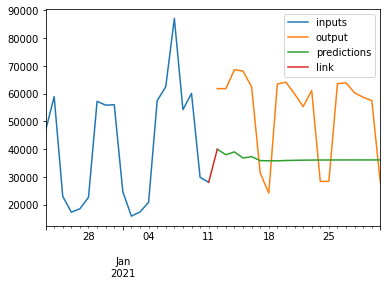

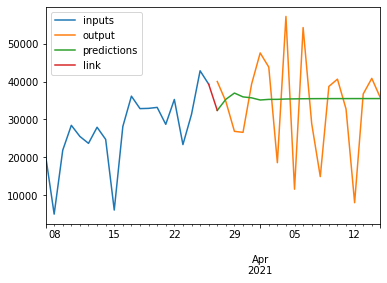

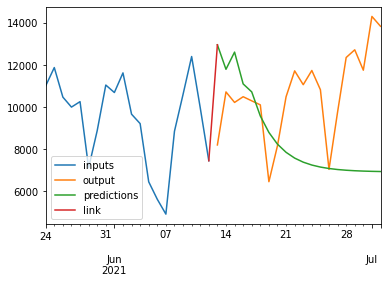

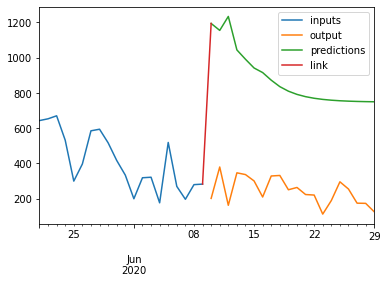

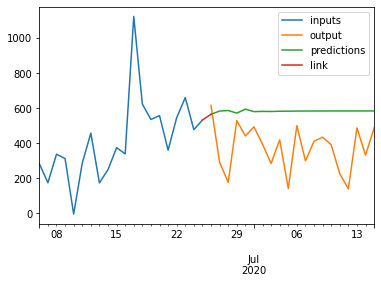

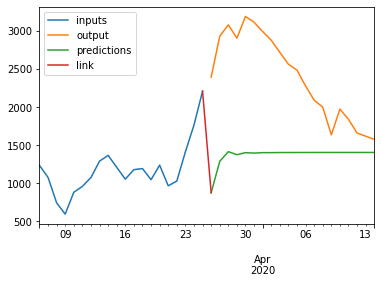

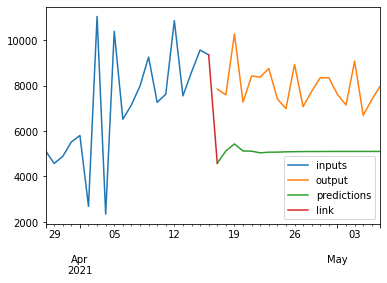

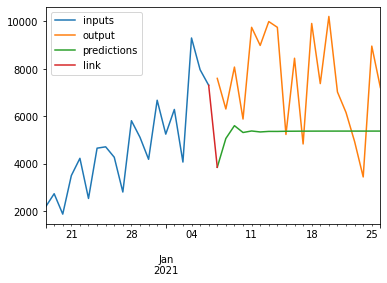

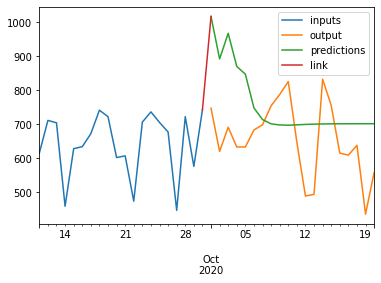

In [46]:
for i in [8, 88, 888, 38, 3888, 4888, 5888, 6888, 6444, 5444, 4444, 3444, 2444]:
    show(i, last_in_dates, input_seq, output_seq, predictions)

In [39]:
def show(i, last_in_dates, input_seq, output_seq, predictions):
    current_date = pd.to_datetime(last_in_dates[i],)
    dates = pd.date_range(start=current_date-timedelta(days=19), end=current_date+timedelta(days=20))
    data_dic = {}
    data_dic["inputs"] = np.concatenate([input_seq[i, :, 1], np.full((20,), np.nan)])
    data_dic["output"] = np.concatenate([np.full((20,), np.nan), output_seq[i, :, 0]])
    data_dic["predictions"] = np.concatenate([np.full((20,), np.nan), predictions[i, :, 0]])
    data_dic["link"] = np.concatenate([np.full((19,), np.nan),np.array([input_seq[i, -1, 1]]), np.array([predictions[i, 0, 0]]), np.full((19,), np.nan)])
    data_df = pd.DataFrame(data=data_dic, index=dates)
    data_df.plot()

In [79]:
output_seq[_, -1].shape

IndexError: index 7258 is out of bounds for axis 0 with size 7258

In [37]:
[np.full((19,), np.nan),np.array(input_seq[i, -1, 1]), np.array(predictions[i, 0, 0]), np.full((19,), np.nan)]

[array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan]),
 array(370.),
 array(333.20328, dtype=float32),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan])]